# ABOUT:
- this notebook contains visualisations of the icu dataset

In [5]:
import sqlite3
import pandas as pd
import yaml
import seaborn as sb

#### connect sqlite database

In [6]:
# If fail, please run preprocessing notebook first 
with open("config.yml", "r") as f:
    config = yaml.safe_load(f)
con = sqlite3.connect(f"{config['SQLITE_DATABASE_DIR']}/ICU.db")

In [19]:
tmp_data = pd.read_sql_query('select * from ICU limit 10', con)
tmp_data

,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
0,4,0,87,3,1,1,80,96,1
1,8,1,27,1,1,1,142,88,1
2,12,1,59,2,0,0,112,80,1
3,14,1,77,3,0,0,100,70,0
4,27,0,76,3,1,1,128,90,1
5,28,1,54,2,0,1,142,103,1
6,32,1,87,3,1,1,110,154,1
7,38,1,69,2,0,1,110,132,1
8,40,1,63,2,0,0,104,66,0
9,41,1,30,1,1,0,144,110,1


### Survival Distribution
- about 80% of people in the ICU wards survive

In [23]:
tmp_data = pd.read_sql_query('select survive from ICU', con)

In [52]:
survival_distribution = tmp_data.value_counts()
survival_distribution/len(tmp_data)

Survive
1          0.8
0          0.2
dtype: float64

[Text(0.5, 1.0, 'Survival Distribution')]

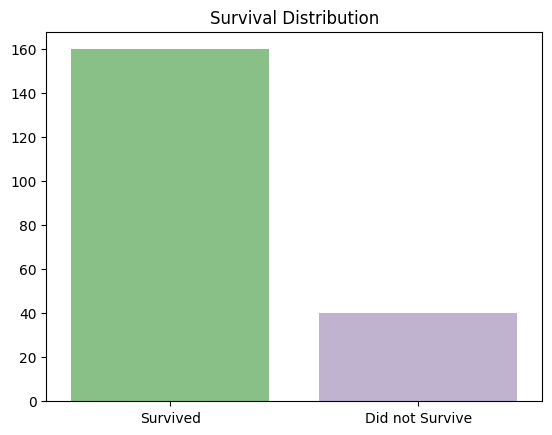

In [53]:
p = sb.barplot(y = survival_distribution.values, x = ["Survived", "Did not Survive"], palette = "Accent")
p.set(title = "Survival Distribution")

### Gender Distribution
- about 62% of people in the ICU wards are Males (assume 0 refers to Male)

In [54]:
tmp_data = pd.read_sql_query('select sex from ICU', con)

In [55]:
distribution = tmp_data.value_counts()
distribution/len(tmp_data)

Sex
0      0.62
1      0.38
dtype: float64

[Text(0.5, 1.0, 'Gender Distribution')]

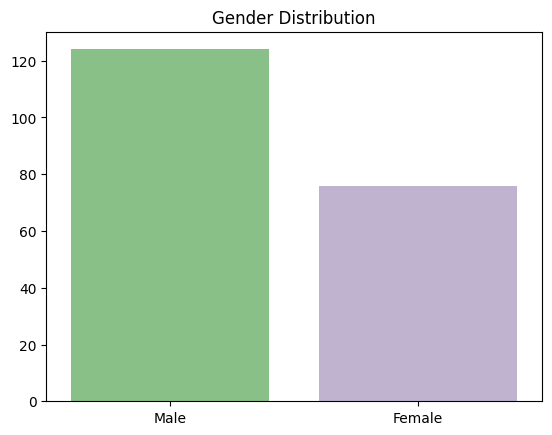

In [57]:
p = sb.barplot(y = distribution.values, x = ["Male", "Female"], palette = "Accent")
p.set(title = "Gender Distribution")

### Infection Distribution
- about 42% of people in the ICU wards are due to infections 

In [103]:
tmp_data = pd.read_sql_query('select infection from ICU', con)

In [104]:
distribution = tmp_data.value_counts()
distribution/len(tmp_data)

Infection
0            0.58
1            0.42
dtype: float64

[Text(0.5, 1.0, 'Infection Distribution')]

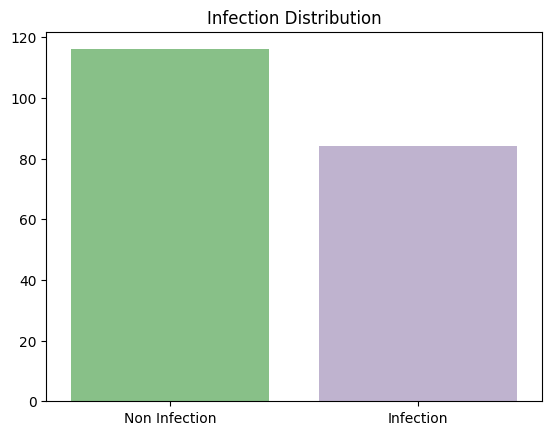

In [105]:
p = sb.barplot(y = distribution.values, x = ["Non Infection", "Infection"], palette = "Accent")
p.set(title = "Infection Distribution")

### Emergency Distribution
- most people getting into ICU are through emergency

In [98]:
tmp_data = pd.read_sql_query('select emergency from ICU', con)

In [102]:
distribution = tmp_data.value_counts()
distribution/len(tmp_data)

Emergency
1            0.735
0            0.265
dtype: float64

[Text(0.5, 1.0, 'Emergency Distribution')]

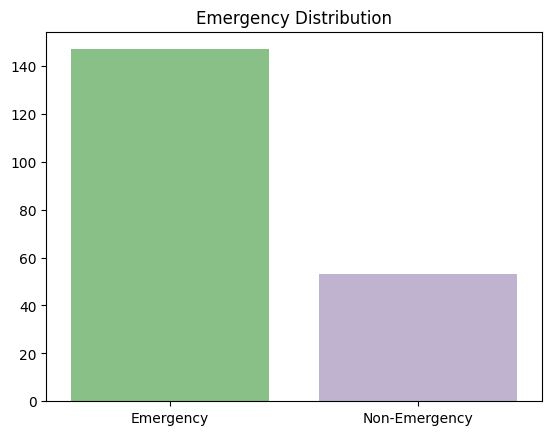

In [101]:
p = sb.barplot(y = distribution.values, x = ["Emergency", "Non-Emergency"], palette = "Accent")
p.set(title = "Emergency Distribution")

### AgeGroup Distribution
- this might be related to age column

In [93]:
tmp_data = pd.read_sql_query('select agegroup from ICU', con)

In [94]:
distribution = tmp_data.value_counts()
distribution/len(tmp_data)

AgeGroup
2           0.385
3           0.320
1           0.295
dtype: float64

[Text(0.5, 1.0, 'AgeGroup Distribution'), Text(0.5, 0, 'AgeGroup')]

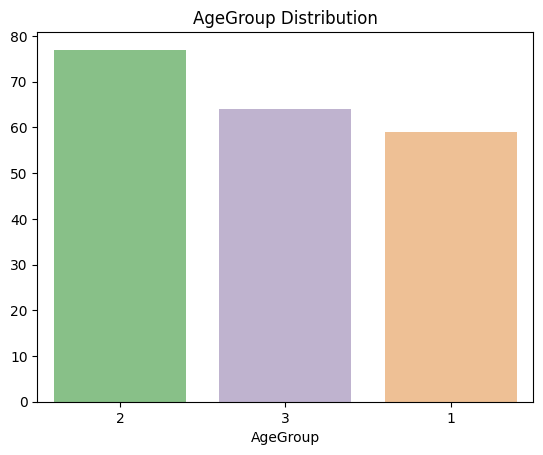

In [97]:
p = sb.barplot(y = distribution.values, x = ["2", "3", "1"], palette = "Accent", )
p.set(title = "AgeGroup Distribution", xlabel = "AgeGroup")

### Age Distribution
- Large majority of ICU patients are above the age of 50
- People aged around 20 are also likely icu patients, maybe due to accidents

In [83]:
tmp_data = pd.read_sql_query('select age from ICU', con)

[[Text(0, 0.0, ''),
  Text(0, 0.005, ''),
  Text(0, 0.01, ''),
  Text(0, 0.015, ''),
  Text(0, 0.02, ''),
  Text(0, 0.025, '')],
 Text(0.5, 1.0, 'Age Disribution')]

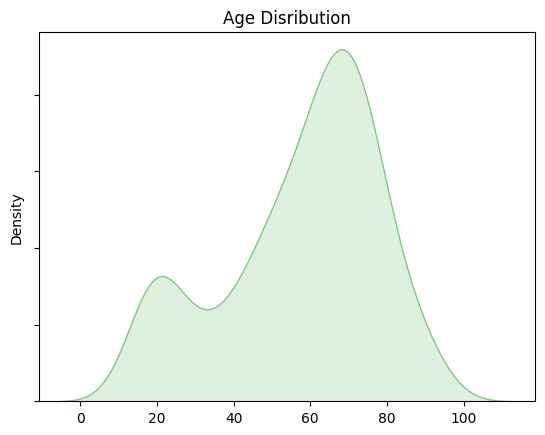

In [86]:
p = sb.kdeplot(data = tmp_data, palette = "Accent", fill = True, legend = False)
p.set(yticklabels = [], title = "Age Disribution")
# p.set(title = "Gender Distribution")

### SysBP Distribution

In [87]:
tmp_data = pd.read_sql_query('select SysBP from ICU', con)

[[Text(0, 0.0, ''),
  Text(0, 0.002, ''),
  Text(0, 0.004, ''),
  Text(0, 0.006, ''),
  Text(0, 0.008, ''),
  Text(0, 0.01, ''),
  Text(0, 0.012, ''),
  Text(0, 0.014, '')],
 Text(0.5, 1.0, 'SysBP Distribution')]

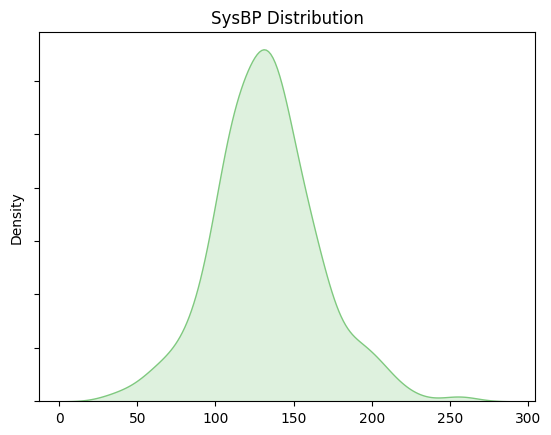

In [89]:
p = sb.kdeplot(data = tmp_data, palette = "Accent", fill = True, legend = False)
p.set(yticklabels = [], title = "SysBP Distribution")
# p.set(title = "Gender Distribution")

### Pulse Distribution

In [91]:
tmp_data = pd.read_sql_query('select pulse from ICU', con)

[[Text(0, 0.0, ''),
  Text(0, 0.002, ''),
  Text(0, 0.004, ''),
  Text(0, 0.006, ''),
  Text(0, 0.008, ''),
  Text(0, 0.01, ''),
  Text(0, 0.012, ''),
  Text(0, 0.014, ''),
  Text(0, 0.016, '')],
 Text(0.5, 1.0, 'Pulse Distribution')]

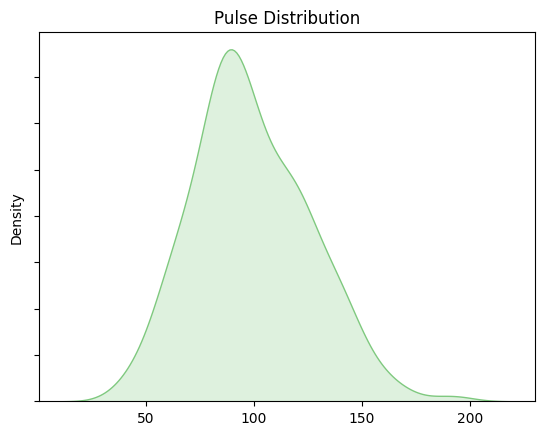

In [92]:
p = sb.kdeplot(data = tmp_data, palette = "Accent", fill = True, legend = False)
p.set(yticklabels = [], title = "Pulse Distribution")
# p.set(title = "Gender Distribution")

# Data Analysis
- during modelling, we find that Age,SysBP and Emergency are most predictive of survival, so it'll be good to perform some analysis there